**INDIA STARTUP FUNDING ANALYSIS**

**Hypothesis**

Tech industries have the highest number of startups

**Questions**

1.Which startups got the highest funding? / top 10 startups funded based on funding?

2.Which startup got the least funding?

3.Which sector(industry) has the most startups?

4.What are the top 10 cities with the most startups?

5.Which period/years had the most number of startups?

6.What are the top 10 stage(investment types)?


**Importing Python Libraries**

In [1]:
#importing libraries
import pathlib as path 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import glob as glob
import os
from forex_python.converter import get_currency_code_from_symbol
from forex_python import converter
%matplotlib inline
import warnings



**Uploading and Merging all 3 Data sets**

In [2]:
# uploading and merging files from path
path = r"C:\Users\selas\OneDrive\Desktop\india startup_funding 2018 - 2021\startup_funding2018.csv.csv"
joined_files = glob.glob(os.path.join(path , "/Users/selas/OneDrive/Desktop/india startup_funding 2018 - 2021/*.csv"))

# a list of all joined files in return

# finally, the files are joined here
data = pd.concat((pd.read_csv(f) for f in joined_files), ignore_index=True)
data

,Company Name,Industry,Round/Series,Amount,Location,About Company,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,NaN,NaN,NaN,NaN,NaN,NaN,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,"$3,000,000",Pre-series A,NaN
2875,NaN,NaN,NaN,NaN,NaN,NaN,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,"$20,000,000",Series D,NaN
2876,NaN,NaN,NaN,NaN,NaN,NaN,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,"$55,000,000",Series C,NaN
2877,NaN,NaN,NaN,NaN,NaN,NaN,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital","$26,000,000",Series B,NaN


**Exploring Data**

In [3]:
#getting the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   Company/Brand  2353 non-null   object
 7   Founded        2111 non-null   object
 8   HeadQuarter    2239 non-null   object
 9   Sector         2335 non-null   object
 10  What it does   2353 non-null   object
 11  Founders       2334 non-null   object
 12  Investor       2253 non-null   object
 13  Amount($)      2347 non-null   object
 14  Stage          1415 non-null   object
 15  Unnamed: 9     2 non-null      object
dtypes: object(16)
memory usage: 360.0+ KB


From this output, we can see that there are columns with missing/null values, so we need to either fill them up or just ignore some. 

**DATA CLEANING**

Lets find out the number of missing data we have.

In [4]:
# checking for missing values
null_values = pd.isnull(data).sum()
columns = null_values.index
frequency = null_values.values
missing_values = ({'Columns':columns, 'missing data':frequency})
missing_values

{'Columns': Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
        'About Company', 'Company/Brand', 'Founded', 'HeadQuarter', 'Sector',
        'What it does', 'Founders', 'Investor', 'Amount($)', 'Stage',
        'Unnamed: 9'],
       dtype='object'),
 'missing data': array([2353, 2353, 2353, 2353, 2353, 2353,  526,  768,  640,  544,  526,
         545,  626,  532, 1464, 2877], dtype=int64)}

In [5]:
# checking of the column unnamed: 9
data['Unnamed: 9'].describe()

count            2
unique           2
top       Pre-Seed
freq             1
Name: Unnamed: 9, dtype: object

We will be droping the column 'Unnamed: 9' later because almost all the rows are null with the exception of 2 which are filled with stage vallue (pre-seed).

Now, since the Amount in the 2018 dataset is in INR (rupees), lets split it and remove the rupees symbol firts. After that, then we convert it into dollars.

In [6]:

# converting amount in rupees into dollars

data['Amount'] = data['Amount'].apply(str)
data['Amount'] = data['Amount'].replace(",", "", regex=True)
data['INR Amount'] = data['Amount'].str.rsplit('₹', n = 2).str[1]
data['INR Amount'] = data['INR Amount'].apply(float)

data['INR Amount'] = data['INR Amount'].fillna(0)
data['Amount_USD'] = data['INR Amount'] * 0.0144
data['Amount_USD'] = data['Amount_USD'].replace(0, np.nan)

data['Amount_USD'] = data['Amount_USD'].fillna(data['Amount'])
data['Amount_USD'] = data['Amount_USD'].replace("$", "", regex=True)
data['Amount'] = data['Amount'].replace("$", "", regex=True)
data['Amount'] = data['Amount_USD']
data


,Company Name,Industry,Round/Series,Amount,Location,About Company,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9,INR Amount,Amount_USD
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,250000
1,Happy Cow Dairy,"Agriculture, Farming",Seed,576000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000000.0,576000.0
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,936000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65000000.0,936000.0
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2000000
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,—
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,NaN,NaN,NaN,nan,NaN,NaN,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,"$3,000,000",Pre-series A,NaN,0.0,nan
2875,NaN,NaN,NaN,nan,NaN,NaN,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,"$20,000,000",Series D,NaN,0.0,nan
2876,NaN,NaN,NaN,nan,NaN,NaN,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,"$55,000,000",Series C,NaN,0.0,nan
2877,NaN,NaN,NaN,nan,NaN,NaN,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital","$26,000,000",Series B,NaN,0.0,nan


Now that the conversion is done, lets join the columns from the merged dataset with the same content but different titles.

In [7]:


# merging columns company name and company/brand.
data['Company Name'] = data['Company Name'].mask(data['Company Name'].isna(), data['Company/Brand'])

# merging columns locaion and headquarters. 
data['HeadQuarter'] = data['HeadQuarter'].mask(data['HeadQuarter'].isna(), data['Location'])

# merging columns About company and what it does. 
data['What it does'] = data['What it does'].mask(data['What it does'].isna(), data['About Company'])

# merging columns amount_USD and amount($).  
data['Amount($)'] = data['Amount($)'].mask(data['Amount($)'].isna(), data['Amount_USD'])

# merging columns. filling NAN 
data['Sector'] = data['Sector'].mask(data['Sector'].isna(), data['Industry'])

# merging columns. filling NAN 
data['Stage'] = data['Stage'].mask(data['Stage'].isna(), data['Round/Series'])





After joining, lets now drop the duplicated columns and the column 'Unnamed:9'

In [8]:
# droping the column = company/brand 
data = data.drop(columns = ["Company/Brand"])

# droping the column = location
data = data.drop(columns = ["Location"])

# droping the column = About Company
data = data.drop(columns = ["About Company"])

# droping the column = Amount
data = data.drop(columns = ["Amount"])
data = data.drop(columns=["Amount_USD"])
data = data.drop(columns=["INR Amount"])

# droping the column = industry
data = data.drop(columns = ["Industry"])

# droping the column = Round/Series
data = data.drop(columns = ["Round/Series"])

data = data.drop(columns=["Unnamed: 9"])



In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  2879 non-null   object
 1   Founded       2111 non-null   object
 2   HeadQuarter   2765 non-null   object
 3   Sector        2861 non-null   object
 4   What it does  2879 non-null   object
 5   Founders      2334 non-null   object
 6   Investor      2253 non-null   object
 7   Amount($)     2879 non-null   object
 8   Stage         1941 non-null   object
dtypes: object(9)
memory usage: 202.6+ KB


We now have a total of 9 columns we will work with. Lets go ahead and clean the column that will be needed for our data visualization.

In [10]:
#checking for the top stage
data['Stage'].describe()

count     1941
unique      75
top       Seed
freq       606
Name: Stage, dtype: object

filling up null values

In [11]:
#filling up null values with not specified
data['Founded'].fillna(value='not specified',inplace=True)

#filling null values with not specified
data['Founders'].fillna(value='not specified',inplace=True)

#filling null values with not specified
data['Investor'].fillna(value='undisclosed',inplace=True)

#filling null values with not specified
data['HeadQuarter'].fillna(value='not specified',inplace=True)

#filling null values with not specified
data['Sector'].fillna(value='not specified',inplace=True)

#filling null values with not specified
data['Amount($)'].fillna(value='not specified',inplace=True)

#filling null values with the most common or top most value which is Seed
data['Stage'].fillna(value='Seed',inplace=True)

In [12]:
# changing some column names
data = data.rename({'Founded':'Year Founded', 'Amount($)':'AmountInUSD'}, axis='columns')

removing the $ sign and comma's in the AmountInUSD column.

In [13]:
# Removing dollar sign $ from column AmountInUSD

#data['AmountInUSD'] = data['AmountInUSD'].apply(str)
#data['AmountInUSD'] = data['AmountInUSD'].replace(",", "", regex=True)
#data['AmountInUSD'] = data['AmountInUSD'].replace("-", "", regex=True)
#data['AmountInUSD'] = data['AmountInUSD'].str.replace("$", "").astype(float)
#data.AmountInUSD = data.AmountInUSD.apply(lambda x:x.replace('$','').replace(',',''))
data['AmountInUSD'] = data['AmountInUSD'].str.replace(',','', regex=True).str.replace('$','', regex=True)


We did not fill up the missing values for the AmountInUSD column because unlike age which we could find the mean age and use it to fill up for null values, we cant do same for amount. As the funding provided to startups vary due to factors such as business models, requirement of funds, and so on. That is why, the missing values of funding should not be filled by measures of central tendency.

we replaced null values for HQ earlier with not specified. so now we are cleaning the column up by picking just the first name.

In [14]:
# Cleaning Headquarters column up to have only one city name.Making a function to check if multiple cities are mentioned separated by ',',
#  if yes, then replace it with the first name.

def HQ_cleaner(x):
    return x.split(',')[0].strip()

In [15]:
data['HeadQuarter']=data['HeadQuarter'].apply(HQ_cleaner)
data


,Company Name,Year Founded,HeadQuarter,Sector,What it does,Founders,Investor,AmountInUSD,Stage
0,TheCollegeFever,not specified,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",not specified,undisclosed,250000,Seed
1,Happy Cow Dairy,not specified,Mumbai,"Agriculture, Farming",A startup which aggregates milk from dairy far...,not specified,undisclosed,NaN,Seed
2,MyLoanCare,not specified,Gurgaon,"Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,not specified,undisclosed,NaN,Series A
3,PayMe India,not specified,Noida,"Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,not specified,undisclosed,2000000,Angel
4,Eunimart,not specified,Hyderabad,"E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,not specified,undisclosed,—,Seed
...,...,...,...,...,...,...,...,...,...
2874,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,Pre-series A
2875,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,Series D
2876,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,Series C
2877,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000,Series B


In [16]:
# checking for total number for the first 20 cities
data['HeadQuarter'].value_counts().head(20)

Bangalore        866
Mumbai           474
Gurugram         239
New Delhi        232
not specified    114
Chennai          106
Pune             105
Delhi             88
Noida             86
Gurgaon           80
Hyderabad         78
Bengaluru         57
Jaipur            31
Ahmedabad         29
Haryana           26
Kolkata           22
Indore            14
Thane             14
Chandigarh        10
Kochi              8
Name: HeadQuarter, dtype: int64

Using same function to clean the Sector column

In [17]:
# Cleaning Headquarters column up to have only one city name.Making a function to check if multiple sector names were written separated by ',',
#  if yes, then replace it with the first name.

def Sector_cleaner(x):
    return x.split(',')[0].strip()

In [18]:
data['Sector']=data['Sector'].apply(Sector_cleaner)
data

,Company Name,Year Founded,HeadQuarter,Sector,What it does,Founders,Investor,AmountInUSD,Stage
0,TheCollegeFever,not specified,Bangalore,Brand Marketing,"TheCollegeFever is a hub for fun, fiesta and f...",not specified,undisclosed,250000,Seed
1,Happy Cow Dairy,not specified,Mumbai,Agriculture,A startup which aggregates milk from dairy far...,not specified,undisclosed,NaN,Seed
2,MyLoanCare,not specified,Gurgaon,Credit,Leading Online Loans Marketplace in India,not specified,undisclosed,NaN,Series A
3,PayMe India,not specified,Noida,Financial Services,PayMe India is an innovative FinTech organizat...,not specified,undisclosed,2000000,Angel
4,Eunimart,not specified,Hyderabad,E-Commerce Platforms,Eunimart is a one stop solution for merchants ...,not specified,undisclosed,—,Seed
...,...,...,...,...,...,...,...,...,...
2874,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,Pre-series A
2875,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,Series D
2876,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,Series C
2877,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000,Series B


Converting some columns to lowercases.

In [19]:
# Some columns consists of some values with different caps.  converting all to lowercase so that all have same caps,
data['Sector']=data['Sector'].apply(lambda x: x.lower())
data['Company Name']=data['Company Name'].apply(lambda x: x.lower())
data['HeadQuarter']=data['HeadQuarter'].apply(lambda x: x.lower())
data['Stage']=data['Stage'].apply(lambda x: x.lower())
data

,Company Name,Year Founded,HeadQuarter,Sector,What it does,Founders,Investor,AmountInUSD,Stage
0,thecollegefever,not specified,bangalore,brand marketing,"TheCollegeFever is a hub for fun, fiesta and f...",not specified,undisclosed,250000,seed
1,happy cow dairy,not specified,mumbai,agriculture,A startup which aggregates milk from dairy far...,not specified,undisclosed,NaN,seed
2,myloancare,not specified,gurgaon,credit,Leading Online Loans Marketplace in India,not specified,undisclosed,NaN,series a
3,payme india,not specified,noida,financial services,PayMe India is an innovative FinTech organizat...,not specified,undisclosed,2000000,angel
4,eunimart,not specified,hyderabad,e-commerce platforms,Eunimart is a one stop solution for merchants ...,not specified,undisclosed,—,seed
...,...,...,...,...,...,...,...,...,...
2874,gigforce,2019.0,gurugram,staffing & recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,pre-series a
2875,vahdam,2015.0,new delhi,food & beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,series d
2876,leap finance,2019.0,bangalore,financial services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,series c
2877,collegedekho,2015.0,gurugram,edtech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000,series b


In [20]:
data['Stage'].describe

<bound method NDFrame.describe of 0               seed
1               seed
2           series a
3              angel
4               seed
            ...     
2874    pre-series a
2875        series d
2876        series c
2877        series b
2878        series a
Name: Stage, Length: 2879, dtype: object>

Removing some ambiguous names since we found out from exploring the data that there have been some misspellings and unconsistent names.

In [21]:
#While exploring the data, it was found that there have been separate names for same startups. 
# So let's remove all ambiguous names.
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('financial services','fintech'))
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('finance','fintech'))
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('consumer','fintech'))
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('healthcare','healthtech'))
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('credit','fintech'))
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('internet','e-commerce'))
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('e-commerce platform','e-commerce'))
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('e-commerces','e-commerce'))
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('information technology & services','information services'))
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('information services','information services'))
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('agriculture','agritech'))
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('education','edtech'))
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('e-learning','edtech'))
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('farming','agritech'))
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('food & bevarages','food and beverages'))
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('food delivery','food and beverages'))
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('food processing','food and beverages'))
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('food industry','food and beverages'))
data['Company Name']=data['Company Name'].apply(lambda x: str(x).replace("byju's","byju's"))
#data['Company Name']=data['Company Name'].apply(lambda x: str(x).replace('reliance retail ventures','reliance retail ventures ltd'))
#data['Company Name']=data['Company Name'].apply(lambda x: str(x).replace('reliance retail ventures ltd ltd','reliance retail ventures ltd'))
data['Company Name']=data['Company Name'].apply(lambda x: str(x).replace("byju","byju's"))
data['Stage']=data['Stage'].apply(lambda x: str(x).replace('pre- series a','pre-series a'))
data['Stage']=data['Stage'].apply(lambda x: str(x).replace('series a-1','series a'))
data['Stage']=data['Stage'].apply(lambda x: str(x).replace('series round & series a','series a'))

#interchanged columns. hauz khas was in sector column instead of HQ column likewise Food and beverages was in HQ instead of Sector
data['Sector']=data['Sector'].apply(lambda x: str(x).replace('hauz khas','food and beverages'))
data['HeadQuarter']=data['HeadQuarter'].apply(lambda x: str(x).replace('food and beverages','hauz khas'))
data['HeadQuarter']=data['HeadQuarter'].apply(lambda x: str(x).replace('bengaluru','bangalore'))
data['HeadQuarter']=data['HeadQuarter'].apply(lambda x: str(x).replace('gurugram','gurgaon'))



data

,Company Name,Year Founded,HeadQuarter,Sector,What it does,Founders,Investor,AmountInUSD,Stage
0,thecollegefever,not specified,bangalore,brand marketing,"TheCollegeFever is a hub for fun, fiesta and f...",not specified,undisclosed,250000,seed
1,happy cow dairy,not specified,mumbai,agritech,A startup which aggregates milk from dairy far...,not specified,undisclosed,NaN,seed
2,myloancare,not specified,gurgaon,fintech,Leading Online Loans Marketplace in India,not specified,undisclosed,NaN,series a
3,payme india,not specified,noida,fintech,PayMe India is an innovative FinTech organizat...,not specified,undisclosed,2000000,angel
4,eunimart,not specified,hyderabad,e-commerce,Eunimart is a one stop solution for merchants ...,not specified,undisclosed,—,seed
...,...,...,...,...,...,...,...,...,...
2874,gigforce,2019.0,gurgaon,staffing & recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,pre-series a
2875,vahdam,2015.0,new delhi,food & beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,series d
2876,leap finance,2019.0,bangalore,fintech,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,series c
2877,collegedekho,2015.0,gurgaon,edtech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000,series b


In [22]:
data['Sector'].describe()

count        2879
unique        538
top       fintech
freq          383
Name: Sector, dtype: object

Taking off the .0 from the Year Founded column.

In [23]:
# removing .0 from the column Year Founded
data['Year Founded'] = data['Year Founded'].astype(str).apply(lambda x: x.replace('.0',''))
data

,Company Name,Year Founded,HeadQuarter,Sector,What it does,Founders,Investor,AmountInUSD,Stage
0,thecollegefever,not specified,bangalore,brand marketing,"TheCollegeFever is a hub for fun, fiesta and f...",not specified,undisclosed,250000,seed
1,happy cow dairy,not specified,mumbai,agritech,A startup which aggregates milk from dairy far...,not specified,undisclosed,NaN,seed
2,myloancare,not specified,gurgaon,fintech,Leading Online Loans Marketplace in India,not specified,undisclosed,NaN,series a
3,payme india,not specified,noida,fintech,PayMe India is an innovative FinTech organizat...,not specified,undisclosed,2000000,angel
4,eunimart,not specified,hyderabad,e-commerce,Eunimart is a one stop solution for merchants ...,not specified,undisclosed,—,seed
...,...,...,...,...,...,...,...,...,...
2874,gigforce,2019,gurgaon,staffing & recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,pre-series a
2875,vahdam,2015,new delhi,food & beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,series d
2876,leap finance,2019,bangalore,fintech,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,series c
2877,collegedekho,2015,gurgaon,edtech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000,series b


In [24]:
# checking for missing values
null_values = pd.isnull(data).sum()
columns = null_values.index
frequency = null_values.values
missing_values = ({'Columns':columns, 'missing data':frequency})
missing_values

{'Columns': Index(['Company Name', 'Year Founded', 'HeadQuarter', 'Sector', 'What it does',
        'Founders', 'Investor', 'AmountInUSD', 'Stage'],
       dtype='object'),
 'missing data': array([  0,   0,   0,   0,   0,   0,   0, 144,   0], dtype=int64)}

from the above, we can see that we do not have any missing vakues again with the exception of the AmountInUSD column which we are not going to touch.

In [25]:
data['Company Name'].describe()

count         2879
unique        2152
top       bharatpe
freq            10
Name: Company Name, dtype: object

Below, we are changing the Amount column fron string format to a numeric format.

In [26]:
import math
#Changing AmountInUSD from a str into numeric format.
data['AmountInUSD'] = pd.to_numeric(data['AmountInUSD'], errors='coerce')

data['AmountInUSD'].describe().apply(lambda x: math.ceil(x))
# applied math.ceil() to express the numbers in normal format instead of exponential

count            2172
mean        128503326
std        3552101194
min                10
25%           1000000
50%           3000000
75%          13000000
max      150000000000
Name: AmountInUSD, dtype: int64

In [27]:
# This method allows us to make the ticks showed in x-axis more readable by inserting newlines, We can pass in
# a series and it returns a formatted index series

def ticks_display_cleaner(series):
    putSpace=True
    index=list(series.index)
    values=list(series.values)
    for i in range(len(index)):
        c=index[i].strip().split(' ')
        if len(c)>2:
            c.insert(2,'\n')
        if len(c)>5:
            c.insert(5,'\n')
        for j in range(len(c)):
            if c[j]!='\n':
                c[j]=c[j]+' '
        index[i]=''.join(c)
    return pd.Series(values,index=index)
                

* **VISUALIZING DATA**

**Q1 - Which startups got the highest funding? / top 10 startups funded based on funding.**


In [28]:
import math
# Checking for top 10 Startups funded on basis amount.startup with most funding

top_10_startups=pd.DataFrame(data.groupby('Company Name')['AmountInUSD'].sum().sort_values(ascending=False).reset_index().head(10))
top_10_startups['AmountInUSD']=top_10_startups['AmountInUSD'].apply(lambda x: math.ceil(x))
top_10_startups

,Company Name,AmountInUSD
0,alteria capital,150000000000
1,reliance retail ventures ltd,70000000000
2,snowflake,3000000000
3,reliance,2200000000
4,byju's's,2122000000
5,swiggy,1956000000
6,oyo,1665000000
7,byju's’s,1590000000
8,verse innovation,1550000000
9,dream sports,1240000000


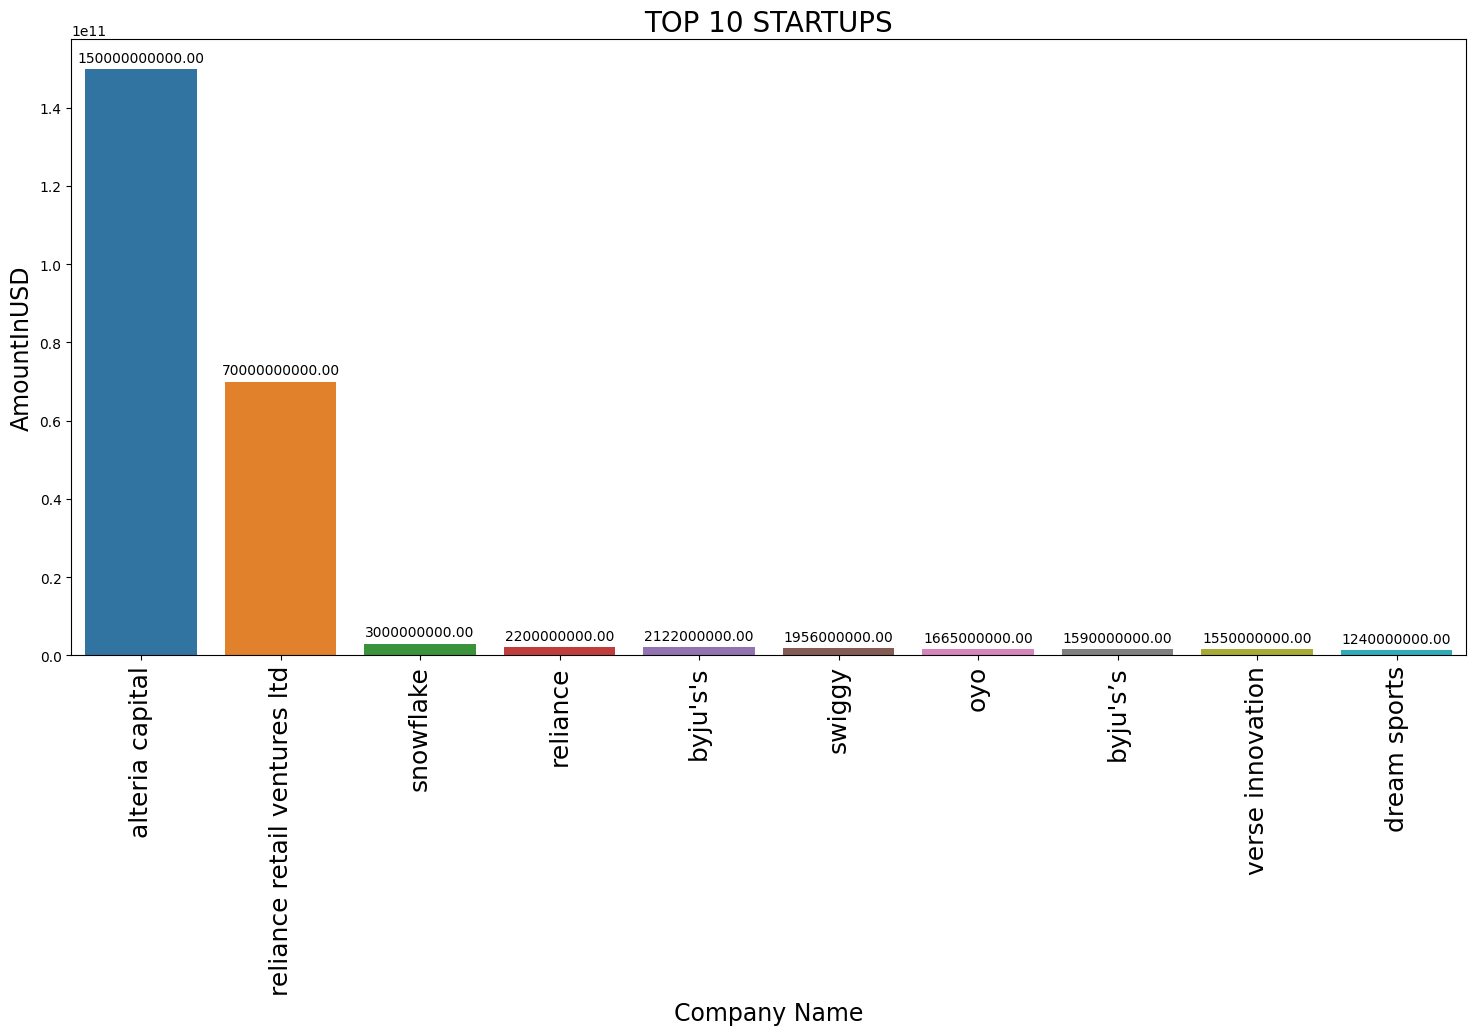

In [29]:
plots=plt.figure(figsize=(18,8))
plots=plt.title('TOP 10 STARTUPS',fontsize=20)
plots=plt.xticks(fontsize=18,rotation='vertical')
plots=plt.xlabel('Sector',fontsize=17)
plots=plt.ylabel('Amount In USD',fontsize=17)
plots=sns.barplot(x='Company Name',y='AmountInUSD',data=top_10_startups)
plt.savefig('top10startups.png',dpi=300)

for bar in plots.patches:
 plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=10, xytext=(0, 8), textcoords='offset points')

plt.show()

The above Output shows the top 10 startups funded between 2018 to 2021.
*alteria capital and reliance retail ventures ltd* are the highest funded startups.

**Q2 - Which startup got the least funding?**


In [30]:
# which startup got the least funding.

print('Minimum funds acquired by a startup: ',data['AmountInUSD'].describe()['min'])

Minimum funds acquired by a startup:  9.6


In [40]:
data[data['AmountInUSD']==9.6]

,Company Name,Year Founded,HeadQuarter,Sector,What it does,Founders,Investor,AmountInUSD,Stage
1167,satya microcapital,1995,delhi,fintech,Microfinance company that offers collateral-fr...,Vivek Tiwari,BlueOrchard Finance Limited,9.6,seed


satya microcapital is the startup who acquired least funding, that is, $9.6

In [41]:
data.loc[1167]

Company Name                                   satya microcapital
Year Founded                                                 1995
HeadQuarter                                                 delhi
Sector                                                    fintech
What it does    Microfinance company that offers collateral-fr...
Founders                                             Vivek Tiwari
Investor                              BlueOrchard Finance Limited
AmountInUSD                                                   9.6
Stage                                                        seed
Name: 1167, dtype: object

**Q3 - Which sector(industry) has the most startups?**


In [32]:
# getting the top 10 industries/sector with the most startups
df=data[data['Sector']!='others']
top_10_industries=data['Sector'].value_counts().sort_values(ascending=False).head(10)
print(top_10_industries)
top_10_industries=ticks_display_cleaner(top_10_industries)

fintech                 383
edtech                  273
healthtech              127
e-commerce              113
agritech                 77
automotive               54
information services     43
food & beverages         39
logistics                37
gaming                   36
Name: Sector, dtype: int64


c:\Users\selas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


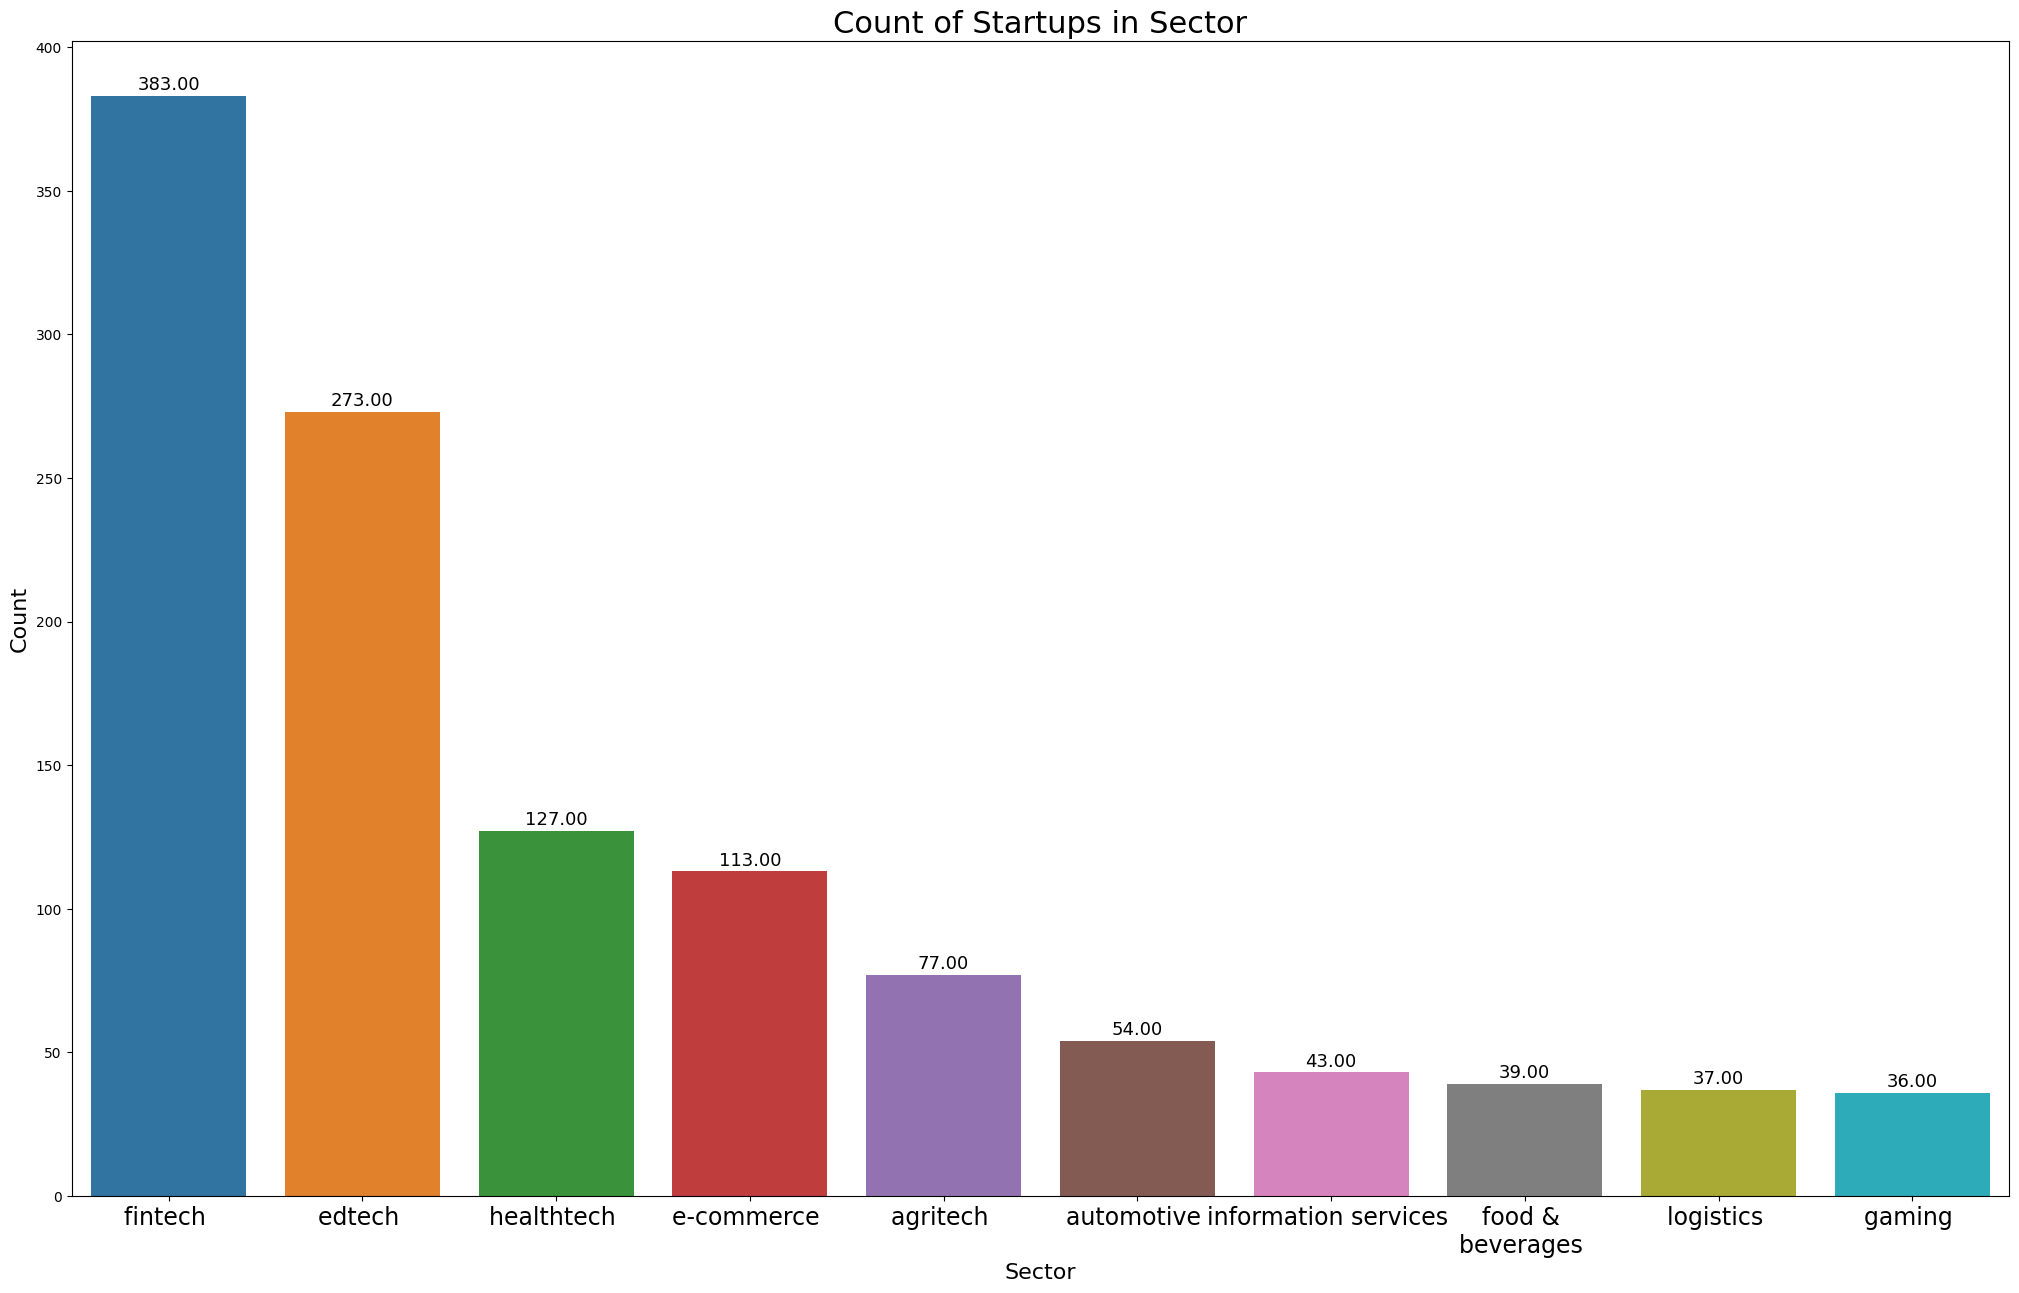

In [33]:
#plotting the top 10 industries/sector with the most startups
plt.figure(figsize=(25,15))
plt.xlabel('Sector',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Count of Startups in Sector',fontsize=22)
plt.xticks(fontsize=17)
plots=sns.barplot(top_10_industries.index,top_10_industries.values)
plt.savefig('Sector.png',dpi=300)
warnings.filterwarnings('ignore')

for bar in plots.patches:
 plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=13, xytext=(0, 8), textcoords='offset points')
plt.show()

The top 3 sectors having most number of startups are:
fintech , edtech , and helthtech


**Q4 - What are the top 10 cities with the most startups?**


In [34]:
#Top 10 Cities / cities with maximum startups
cities=data[data['HeadQuarter']!='not specified']
cities=cities['HeadQuarter'].value_counts().sort_values(ascending=False).head(10)
cities

bangalore    923
mumbai       474
gurgaon      319
new delhi    232
chennai      106
pune         105
delhi         88
noida         86
hyderabad     78
jaipur        31
Name: HeadQuarter, dtype: int64

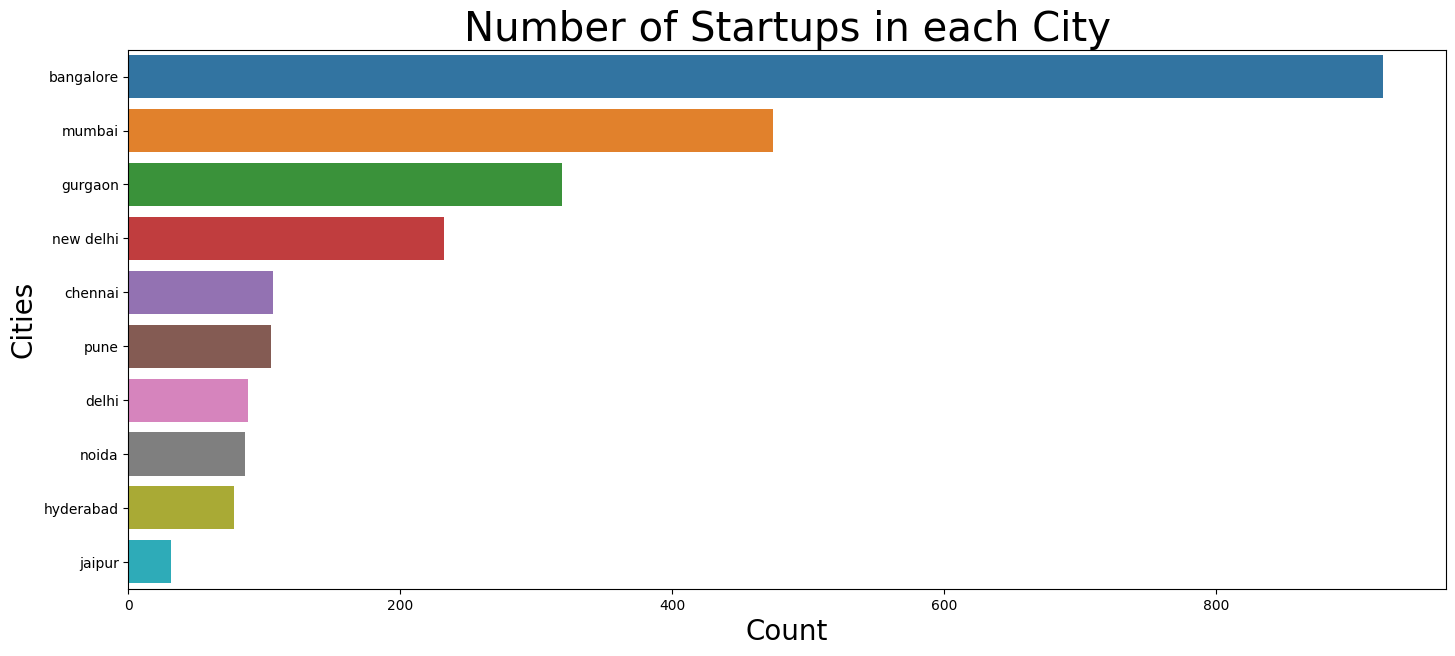

In [35]:

plt.figure(figsize=(17,7))
plt.title('Number of Startups in each City',fontsize=29)
plt.xlabel('Count',fontsize=20)
plt.ylabel('Cities',fontsize=20)
plots=sns.barplot(cities.values,cities.index) #,palette='hot')
warnings.filterwarnings

plt.show()

based on the above graph, the city with the most number of startups is bangalore followed by mumbai, then gurgaon

**Q5 - Which period/years had the most number of startups funded?**


In [36]:
data=data[data['Year Founded']!='not specified']
year_with_most_startups=data['Year Founded'].value_counts().sort_values(ascending=False).head(10)
print(year_with_most_startups)
year_with_most_startups=ticks_display_cleaner(year_with_most_startups)

2019    285
2020    279
2015    277
2018    272
2016    228
2017    209
2014    137
2021     76
2012     74
2011     68
Name: Year Founded, dtype: int64


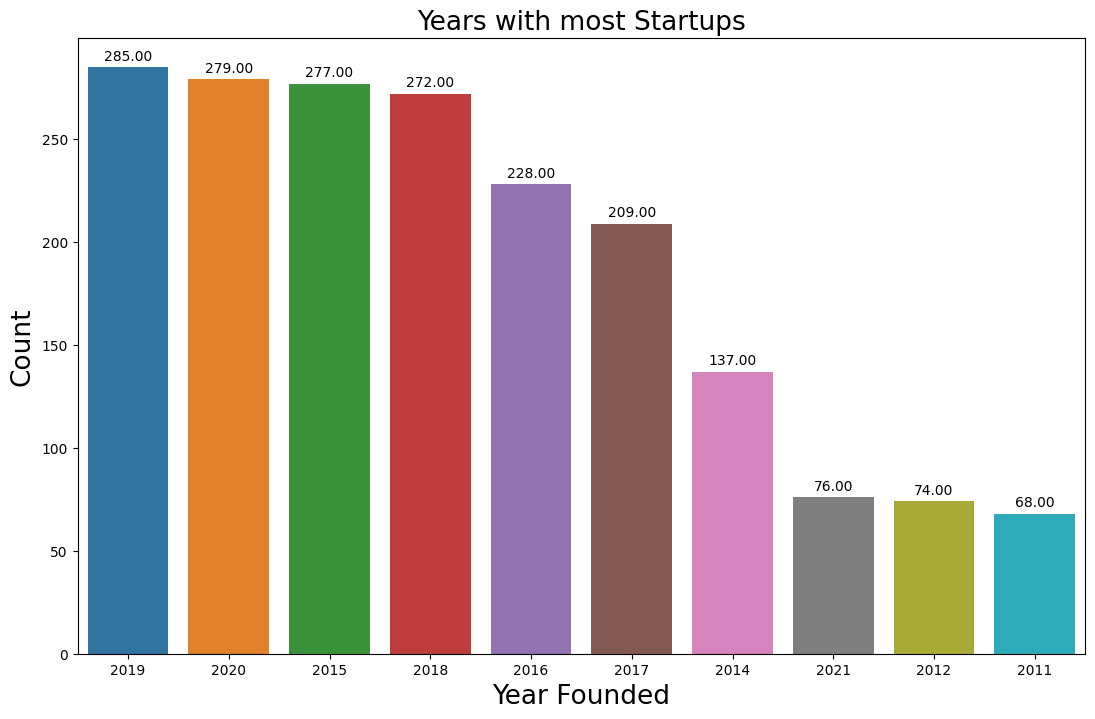

In [37]:
graph_data=data['Year Founded'].value_counts().head(10)
plt.figure(figsize=(13,8))
plt.ylabel('Count',fontsize=19)
plt.xlabel('Year Founded', fontsize=19)
plt.title('Years with most Startups',fontsize=19)
plots=sns.barplot(graph_data.index,graph_data.values)
plt.savefig('Yearswithmoststartup.png',dpi=300)
warnings.filterwarnings('ignore')

for bar in plots.patches:
 plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=10, xytext=(0, 8), textcoords='offset points')

From the above gragh, we can see that the year 2019 had the highest number of startups.

**Q6 - What are the top 10 stage(investment types)**


In [38]:
# top ten stage / investment types
data['Stage'].value_counts().head(10)

seed            1140
pre-series a     211
series a         206
series b          97
series c          92
pre-seed          60
pre series a      53
debt              45
seed round        44
series d          44
Name: Stage, dtype: int64

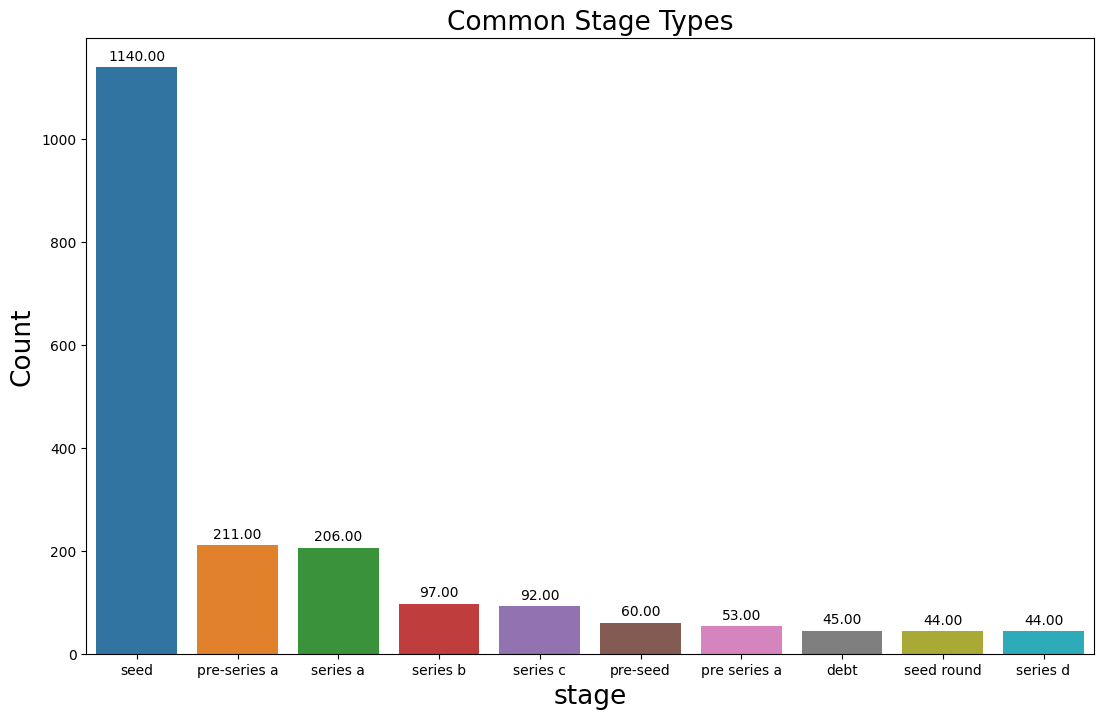

In [39]:
graph_data=data['Stage'].value_counts().head(10)
plt.figure(figsize=(13,8))
plt.ylabel('Count',fontsize=19)
plt.xlabel('stage', fontsize=19)
plt.title('Common Stage Types',fontsize=19)
plots=sns.barplot(graph_data.index,graph_data.values)
plt.savefig('CommonstageTypes.png',dpi=300)
warnings.filterwarnings('ignore')

for bar in plots.patches:
 plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=10, xytext=(0, 8), textcoords='offset points')

We can see that the most common investment type is the seed funding.

**CONCLUSION**

**This is what my analysis was about, we got to know about the industries favored by investors, seed types, and many more interesting observations about the Indian Startup Ecosystem. We also saw the startup with the least funding. We also saw the year in which the India startup ecosystem got the most number of startups formed.**